In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv(r'C:\Users\Zenbook\Downloads\train.csv')
print(df.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [4]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data=df.values
print(data.shape)
print(data)
x=data[:,1:]
y=data[:,0]
print(x.shape,y.shape)

(42000, 785)
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [7 0 0 ... 0 0 0]
 [6 0 0 ... 0 0 0]
 [9 0 0 ... 0 0 0]]
(42000, 784) (42000,)


In [6]:
split=int(0.8*x.shape[0])
print(split)


33600


In [7]:
x_train=x[:split,:]
y_train=y[:split]
x_test=x[split:,:]
y_test=y[split:]

In [11]:
def distance(t1,t2):
    return np.sqrt(sum((t1-t2)**2))

In [12]:
def knn(x,y,querypoint,k=5):
    val=[]
    for i in range(x.shape[0]):
        d=distance(querypoint,x[i])
        val.append((d,y[i]))
    val=sorted(val)
    val=np.array(val)
    val=val[:k]
    #print(val)
    new_val=np.unique(val[:,1],return_counts=True)
    index=new_val[1].argmax()
    pred=new_val[0][index]
    #print(new_val)
    return pred

In [ ]:
pred = knn(x_train,y_train,x_test[1])
print(pred)

In [8]:
def drawimage(sample):
    img=sample.reshape((28,28))
    plt.imshow(img)
    plt.show()

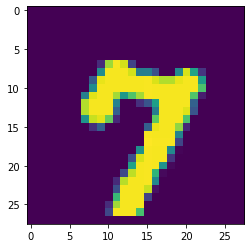

7


In [14]:
drawimage(x_test[1])
print(y_test[1])